Instructions:
1: Finish Major Preprocessing, this includes scaling and/or transforming your data, imputing your data, encoding your data, feature expansion, Feature expansion (example is taking features and generating new features by transforming via polynomial, log multiplication of features).

2: Train your first model

3: Evaluate your model and compare training vs. test error

4: Answer the questions: Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

5: Update your README.md to include your new work and updates you have all added. Make sure to upload all code and notebooks. Provide links in your README.md

6. Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it?

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_original = pd.read_csv('/content/infolimpioavanzadoTarget.csv')

In [69]:
# only need numerical features
numerical_features = df_original.select_dtypes(include=['float64', 'int64']).columns

# only want features highly coorelated to our close feature
close_correlation = df_original[numerical_features].corr()['close'].drop('close')
high_correlation_features = close_correlation[close_correlation.abs() > 0.9]

df = df_original[['date', 'ticker', 'close'] + high_correlation_features.index.tolist()]

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                7781 non-null   object 
 1   ticker              7781 non-null   object 
 2   close               7781 non-null   float64
 3   open                7781 non-null   float64
 4   high                7781 non-null   float64
 5   low                 7781 non-null   float64
 6   adjclose            7781 non-null   float64
 7   vwapadjclosevolume  7774 non-null   float64
 8   atr5                7781 non-null   float64
 9   atr10               7781 non-null   float64
 10  atr15               7781 non-null   float64
 11  atr20               7781 non-null   float64
 12  low-5               7657 non-null   float64
 13  high-5              7657 non-null   float64
 14  low-10              7502 non-null   float64
 15  high-10             7502 non-null   float64
 16  low-15

In [70]:
# Need to ordinally encode date, as it is non numerical
df['date'] = pd.to_datetime(df['date'])
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

print(df.head())

        date ticker      close       open       high        low   adjclose  \
0 2022-01-03   ASLE  17.760000  17.799999  18.219000  17.500000  17.760000   
1 2022-01-04   ASLE  17.660000  17.700001  18.309999  17.620001  17.660000   
2 2022-01-05   ASLE  16.950001  17.580000  17.799999  16.910000  16.950001   
3 2022-01-06   ASLE  16.170000  16.650000  16.879999  16.139999  16.170000   
4 2022-01-07   ASLE  15.710000  16.219999  16.290001  15.630000  15.710000   

   vwapadjclosevolume      atr5     atr10     atr15     atr20  low-5  \
0           16.760000  0.719000  0.719000  0.719000  0.719000    NaN   
1           16.705304  0.713200  0.716100  0.717066  0.717550    NaN   
2           16.475186  0.748560  0.733490  0.728595  0.726172    NaN   
3           16.032647  0.760848  0.741141  0.734022  0.730364    NaN   
4           15.752159  0.740679  0.733027  0.729088  0.726846  15.63   

      high-5  low-10  high-10  low-15  high-15  date_ordinal  
0        NaN     NaN      NaN     N

<ipython-input-70-ea4f5c21bf00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-70-ea4f5c21bf00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)


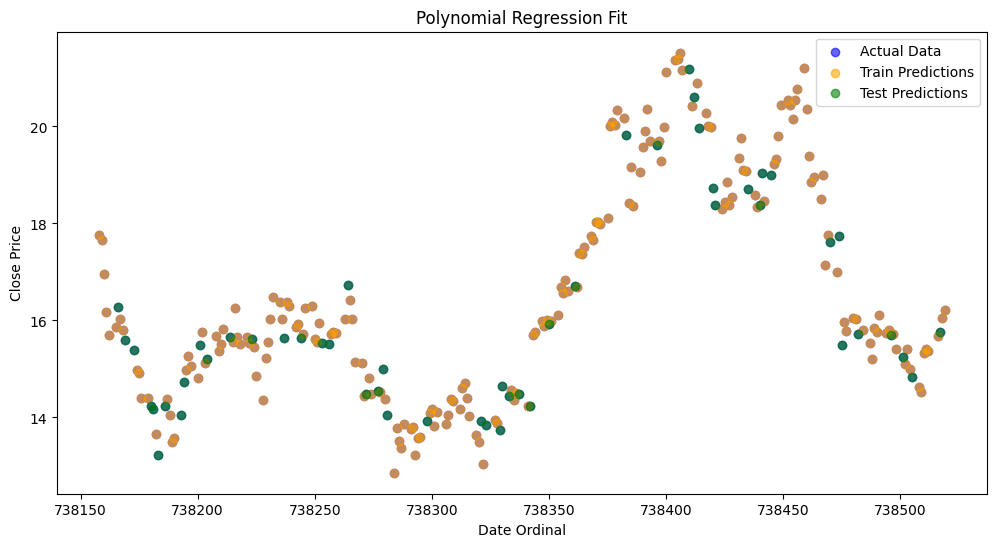

Ticker: ASLE
Train RMSE: 6.210814594767197e-15
Test RMSE: 2.941297955809762e-13




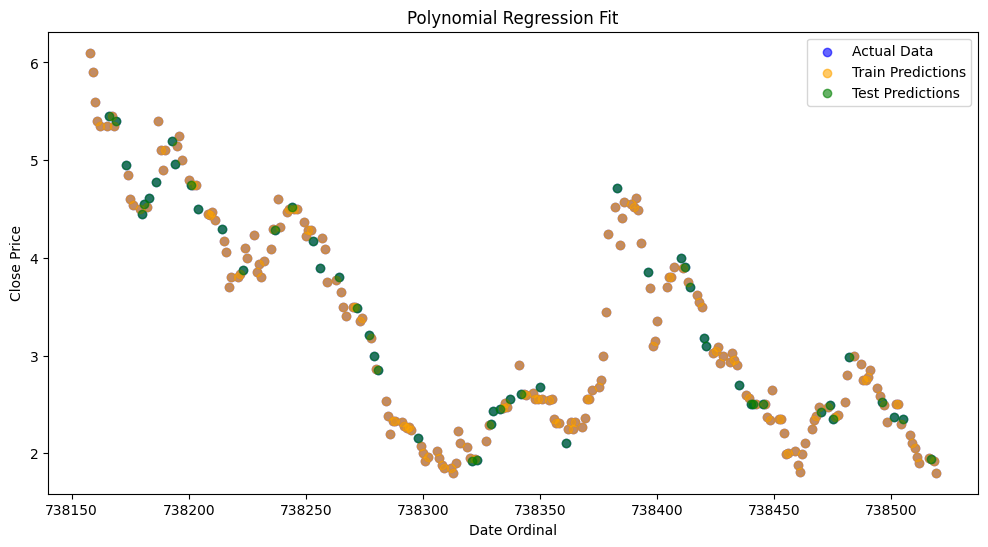

Ticker: ASLN
Train RMSE: 1.578091850818788e-13
Test RMSE: 3.322692078133875e-11




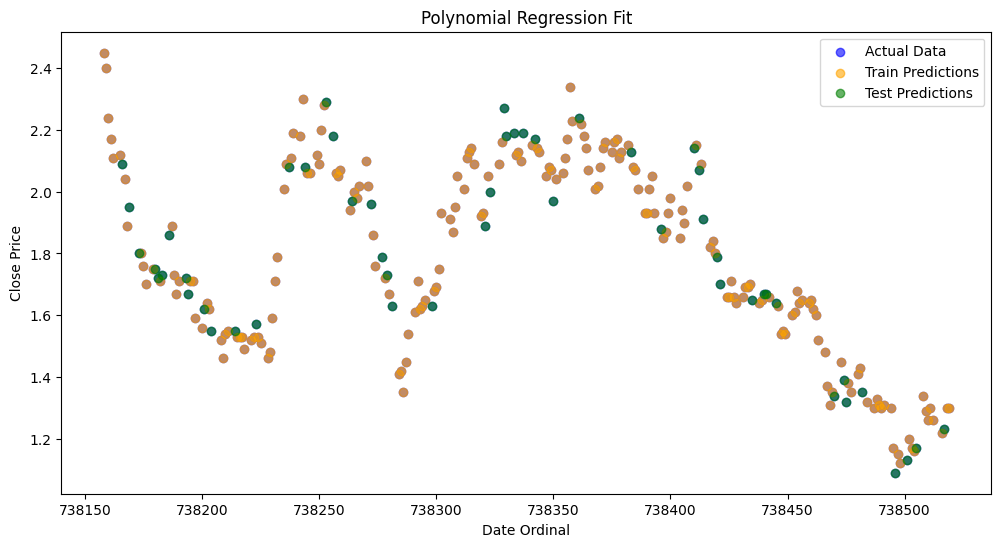

Ticker: ASMB
Train RMSE: 3.1721984041115356e-13
Test RMSE: 2.2219910613583258e-11




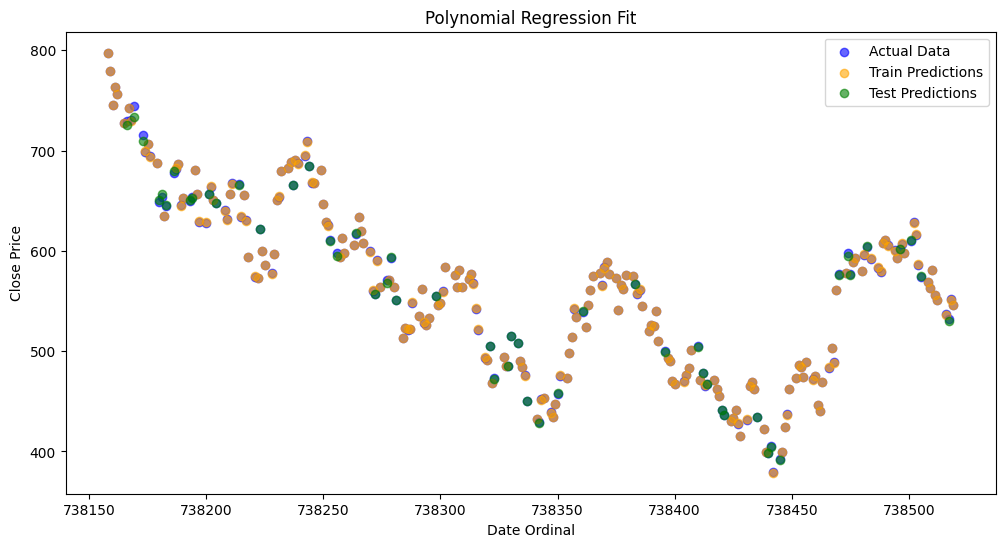

Ticker: ASML
Train RMSE: 0.15176678208656397
Test RMSE: 4.410748056513589




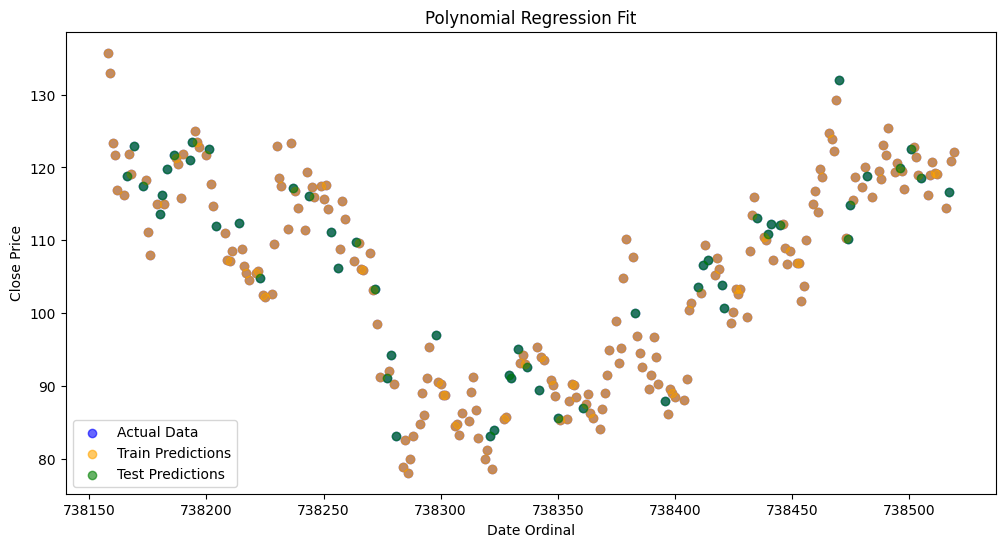

Ticker: ASND
Train RMSE: 3.968678882999217e-14
Test RMSE: 3.2578047904199965e-12




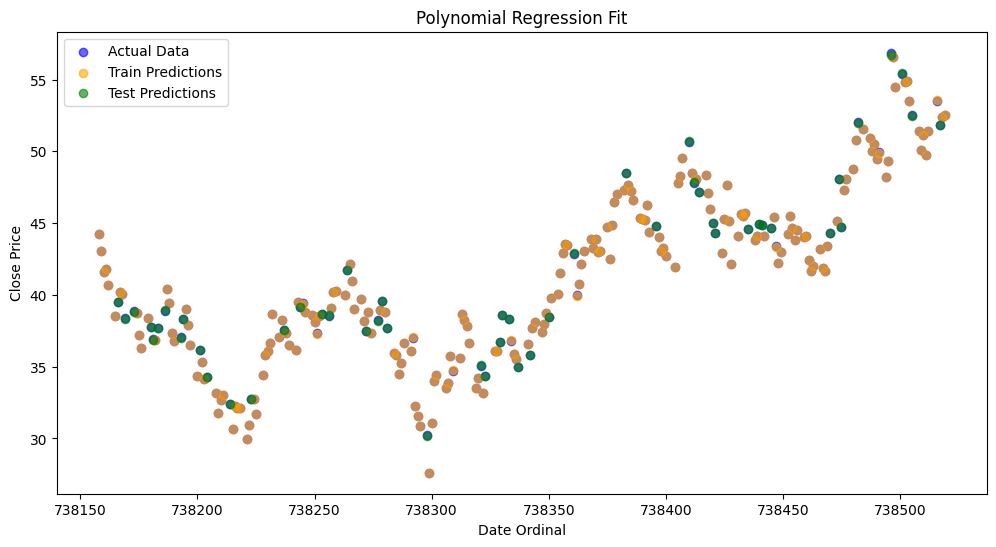

Ticker: ASO
Train RMSE: 1.0831361027753474e-05
Test RMSE: 0.0010358899893288787




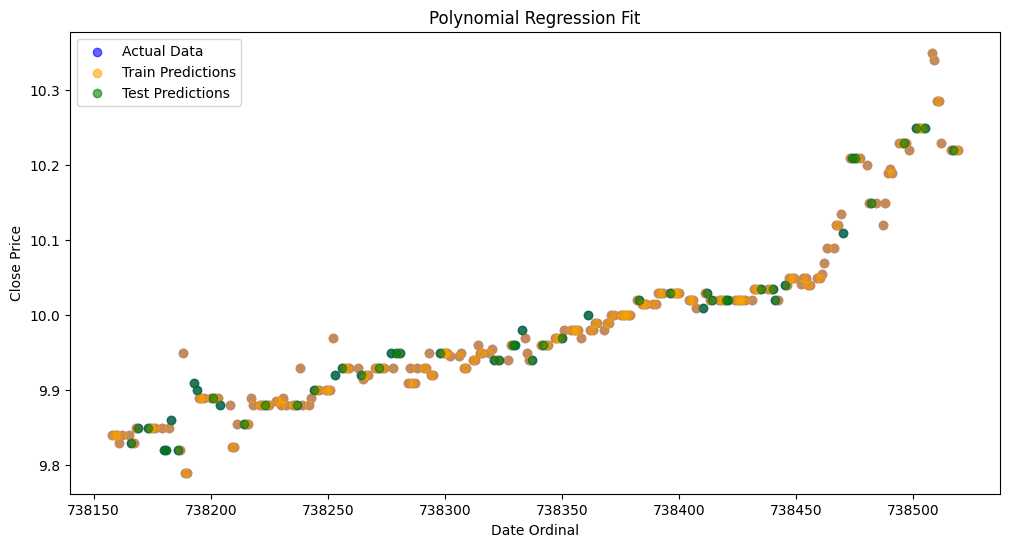

Ticker: ASPA
Train RMSE: 8.729597502443095e-14
Test RMSE: 1.8153917211076836e-12




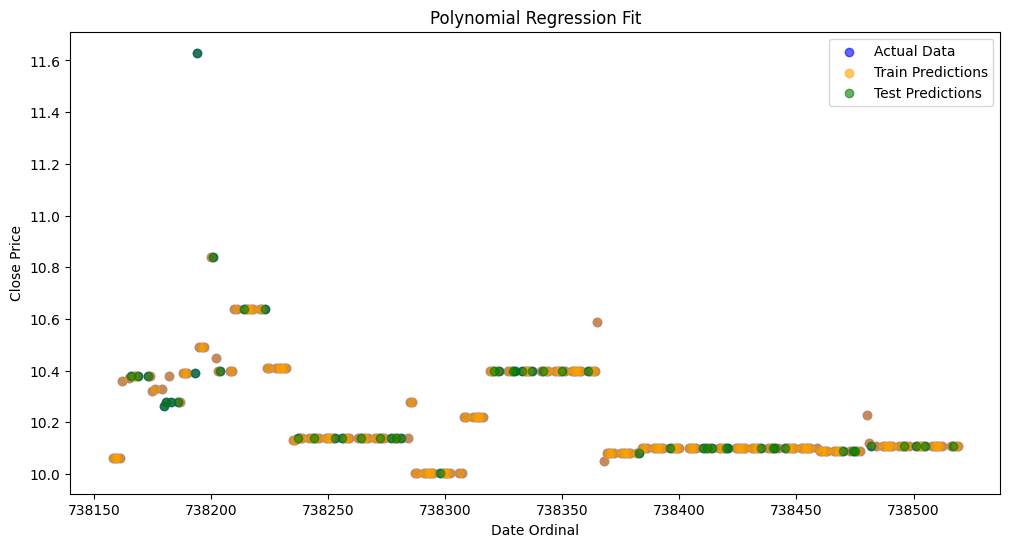

Ticker: ASPAU
Train RMSE: 7.183923545204347e-20
Test RMSE: 1.0887297404999745e-08




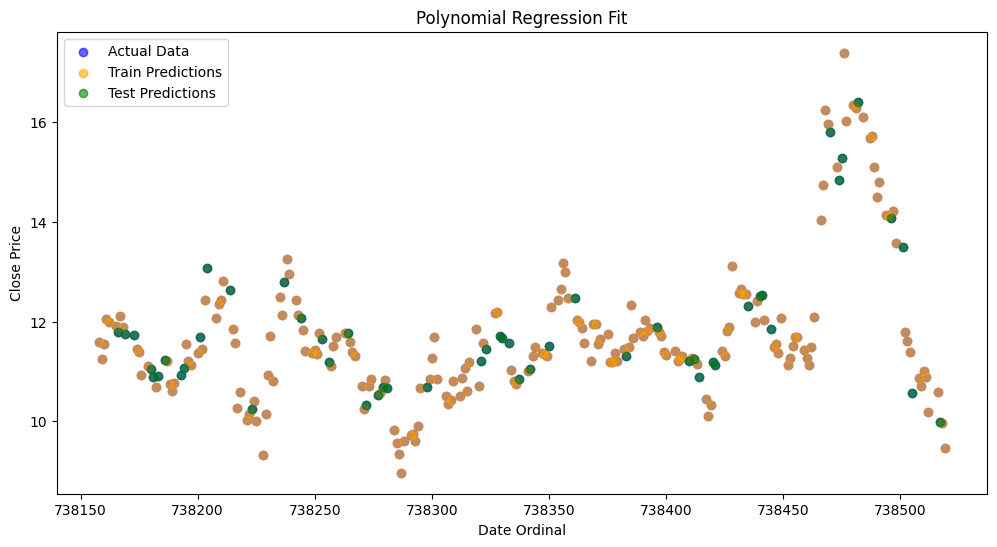

Ticker: ASPS
Train RMSE: 3.345636014224898e-15
Test RMSE: 2.0994491018099102e-13




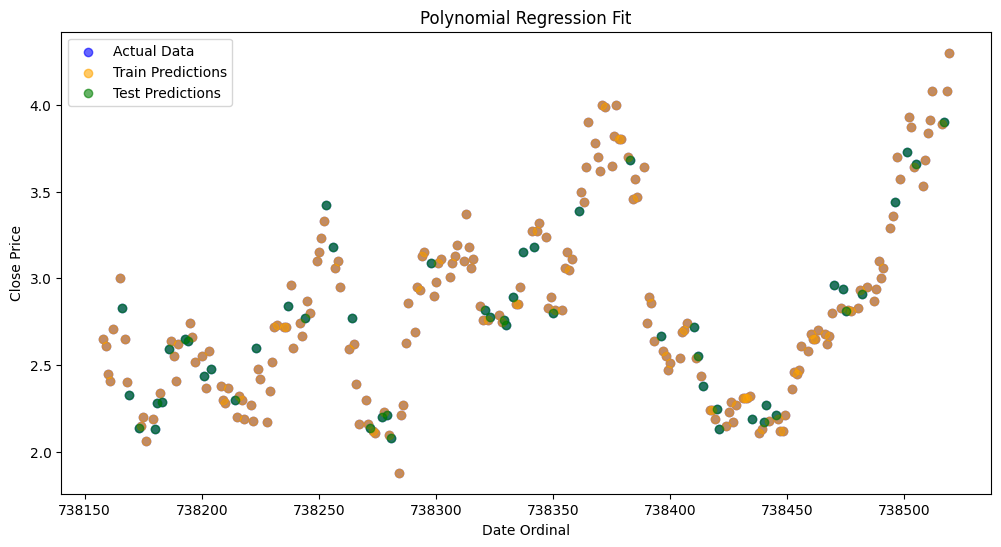

Ticker: ASRT
Train RMSE: 1.4320991122375215e-13
Test RMSE: 8.688655569786332e-13




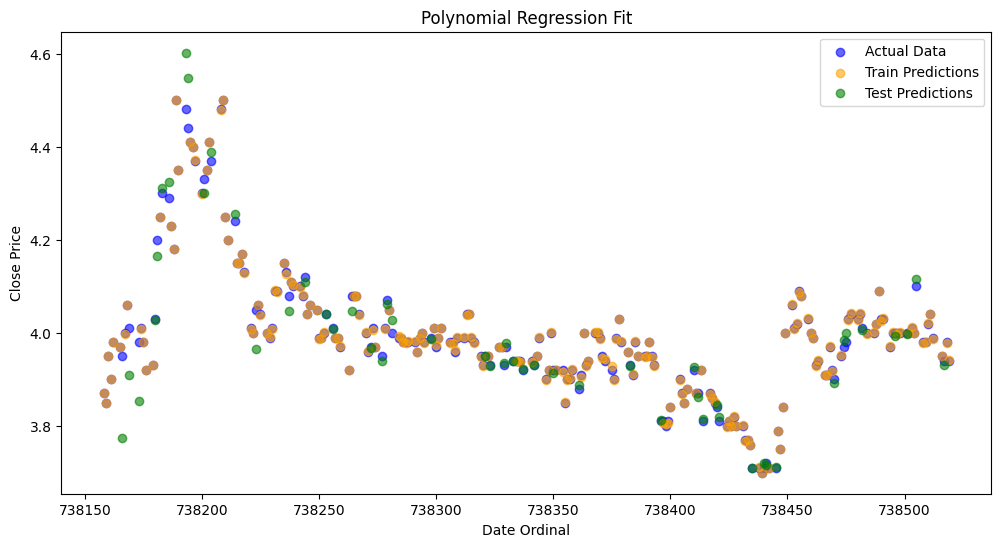

Ticker: ASRV
Train RMSE: 2.8540338228636727e-06
Test RMSE: 0.0019437510288197821




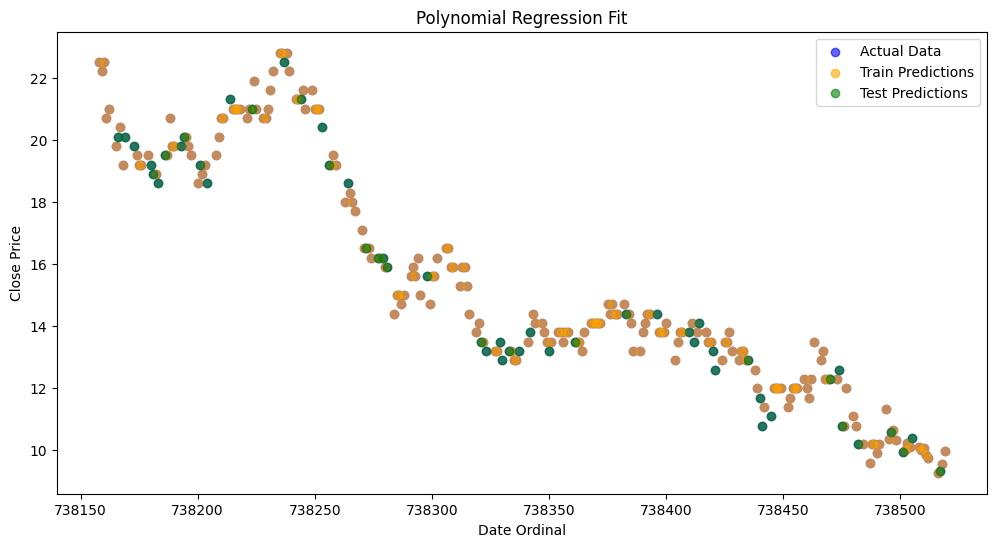

Ticker: ASTC
Train RMSE: 4.422301363893697e-14
Test RMSE: 1.4180475970731715e-12




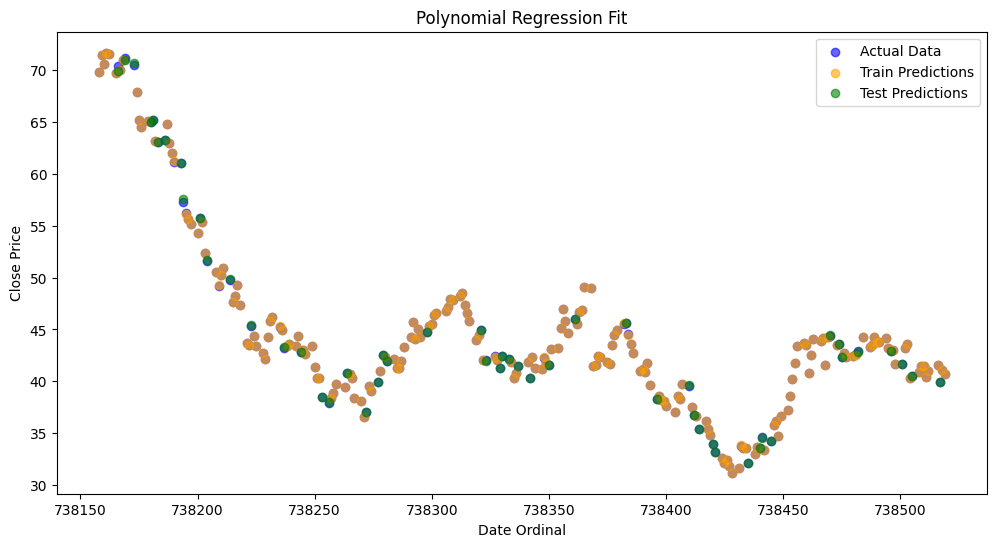

Ticker: ASTE
Train RMSE: 5.042325774389254e-05
Test RMSE: 0.008242739813132904




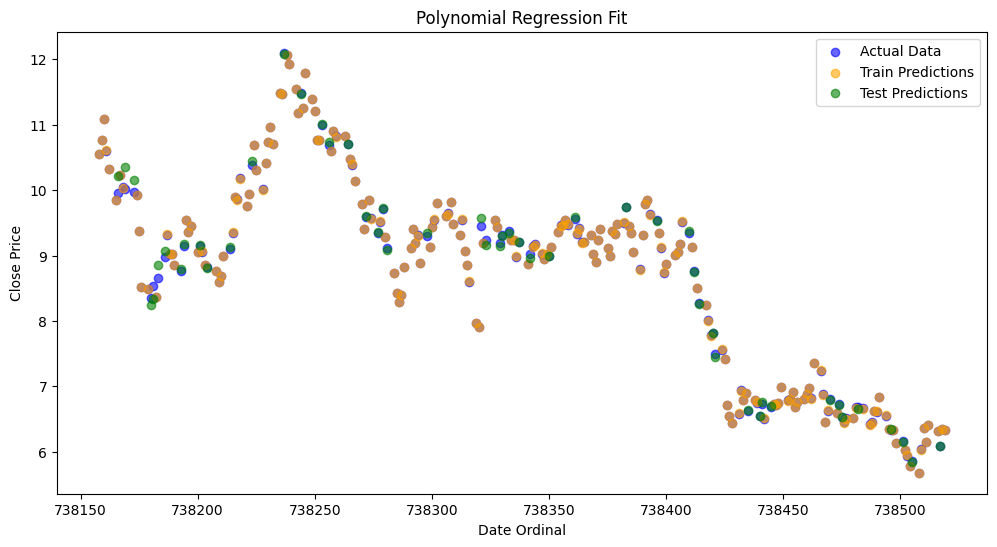

Ticker: ASTL
Train RMSE: 2.2005006919234266e-05
Test RMSE: 0.007223642768252971




In [ ]:
evaluation_results = {}

# process each ticker (unique company)
for ticker in df['ticker'].unique():
    # Filter dataset for the current ticker
    ticker_df = df[df['ticker'] == ticker].copy()

    # Splitting data into features and target
    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # handle missing data
    median_imputer = SimpleImputer(strategy='median')
    num_cols = X.select_dtypes(include=['float64', 'int64']).columns
    X_train[num_cols] = median_imputer.fit_transform(X_train[num_cols])
    X_test[num_cols] = median_imputer.transform(X_test[num_cols])

    # scale features
    stdScaler = StandardScaler()
    minMaxScaler = MinMaxScaler()

    standard = ['open', 'vwapadjclosevolume', 'atr5', 'atr10', 'atr15', 'atr20']
    min_max = ['open', 'high', 'low', 'low-5', 'high-5', 'low-10', 'high-10', 'low-15', 'high-15']

    X_train[standard] = stdScaler.fit_transform(X_train[standard])
    X_test[standard] = stdScaler.transform(X_test[standard])
    X_train[min_max] = minMaxScaler.fit_transform(X_train[min_max])
    X_test[min_max] = minMaxScaler.transform(X_test[min_max])

    # feature expansion
    polynomial = PolynomialFeatures(degree=2, include_bias=False)
    X_train_polynomial = polynomial.fit_transform(X_train)
    X_test_polynomial = polynomial.transform(X_test)

    # train model
    model = LinearRegression()
    model.fit(X_train_polynomial, y_train)

    # make predictions
    y_train_hat = model.predict(X_train_polynomial)
    y_test_hat = model.predict(X_test_polynomial)

    # evaluate model
    train_error = mean_squared_error(y_train, y_train_hat)
    test_error = mean_squared_error(y_test, y_test_hat)

    # Plotting Polynomial Regression fit
    plt.figure(figsize=(12, 6))
    plt.scatter(X['date_ordinal'], y, label="Actual Data", alpha=0.6, color='blue')
    plt.scatter(X_train['date_ordinal'], y_train_hat, label="Train Predictions", color='orange', alpha=0.6)
    plt.scatter(X_test['date_ordinal'], y_test_hat, label="Test Predictions", color='green', alpha=0.6)
    plt.xlabel("Date Ordinal")
    plt.ylabel("Close Price")
    plt.title("Polynomial Regression Fit")
    plt.legend()
    plt.show()

    evaluation_results[ticker] = {
        "Train RMSE": train_error,
        "Test RMSE": test_error
    }

    print(f"Ticker: {ticker}")
    print(f"Train RMSE: {train_error}")
    print(f"Test RMSE: {test_error}")
    print("\n")

# train and test error
train_errors = [metrics["Train RMSE"] for metrics in evaluation_results.values()]
test_errors = [metrics["Test RMSE"] for metrics in evaluation_results.values()]

average_train_error = np.mean(train_errors)
average_test_error = np.mean(test_errors)

print(f"Average Train RMSE: {average_train_error:.4f}")
print(f"Average Test RMSE: {average_test_error:.4f}")

**Q: Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?**

A: As we can see from our charts, our train predictions and test predictions are extremely similar and have almost the exact same shape for every single ticker. That implies that our model fits extremely well in the fitting graph as both the charts and the low RMSE prove that the model performs and fits well on both training and testing. Despite that, the next model we are thinking of is a neural network model because polynomial regression doesn't capture time series properly. Our project is aimed at predicting future stock price movements and with polynomial regression, the predictions are unstable/inaccurate because our data doesn't allow it to properly train the model through time series. In our next model, we plan on employing neural networks through long short-term memory so our model can correctly capture the dates and create time series where the model can convert the dates into sequences and predict the next movement based on the closing prices of the previous days which our polynomial regression model can't do neccesarily.

**Q: What is the conclusion of your 1st model? What can be done to possibly improve it?**

A: What is the conclusion of your 1st model? What can be done to possibly improve it? As stated above, our first model has shown amazing results as it can clearly fit and model both the training and test data as shown by the graphs and RMSE. I think our model was a success but can also have improvements. In regards to pre-processing, many of our features had significantly skewed distributions and long-tailed distributions which standardization may have helped slightly but could have been improved even moreso with log transformations. Furthermore, our ordinal encoding of the 'date' feature doesn't necessarily capture the importance of the feature as it just turns it into an ordered feature without as much meaning as it is supposed to have. For example, certain dates such as such as March 26th, the day when bitcoin splits, or certain days of the week may have significant impact on the closing price of a stock and that value can't be captured in ordinal encoding. Therefore, a different model such as neural nets which employ time series and other tactics will provide a much better result.

**Sources:**

1) ChatGPT was used in multiple ways such as aiding in deciding which methods of standardization should be used, syntax errors, and generating plots. For example, prompts included
* Q: What are useful data preprocessing ideas for a polynomial regression model that is used to predict future stock prices?
* Q: What is the syntax for using ordinal encoding in Python?
* Q: How could I generate a fitting graph for a polynomial regression model?


2) Google Gemini was used for autocompletion to speed up the coding process. However, none of the code that was generated was not already supposed to be written and was only used to make the process faster.

3) Previous submitted homeworks and lecture notebooks